In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def plot_spectrum(s):
    f = np.fft.rfftfreq(len(s))
    return plt.loglog(f, np.abs(np.fft.rfft(s)))[0]


In [7]:
def noise_psd(N, psd = lambda f: 1):
        X_white = np.fft.rfft(np.random.randn(N))
        S = psd(np.fft.rfftfreq(N))
        S = S / np.sqrt(np.mean(S**2))
        X_shaped = X_white * S
        return np.fft.irfft(X_shaped)

def PSDGenerator(f):
    return lambda N: noise_psd(N, f)

@PSDGenerator
def white_noise(f):
    return 1

@PSDGenerator
def blue_noise(f):
    return np.sqrt(f)

@PSDGenerator
def violet_noise(f):
    return f

@PSDGenerator
def brownian_noise(f):
    return 1/np.where(f == 0, float('inf'), f)

@PSDGenerator
def pink_noise(f):
    return 1/np.where(f == 0, float('inf'), np.sqrt(f))

(0.001, 4525887.213591214)

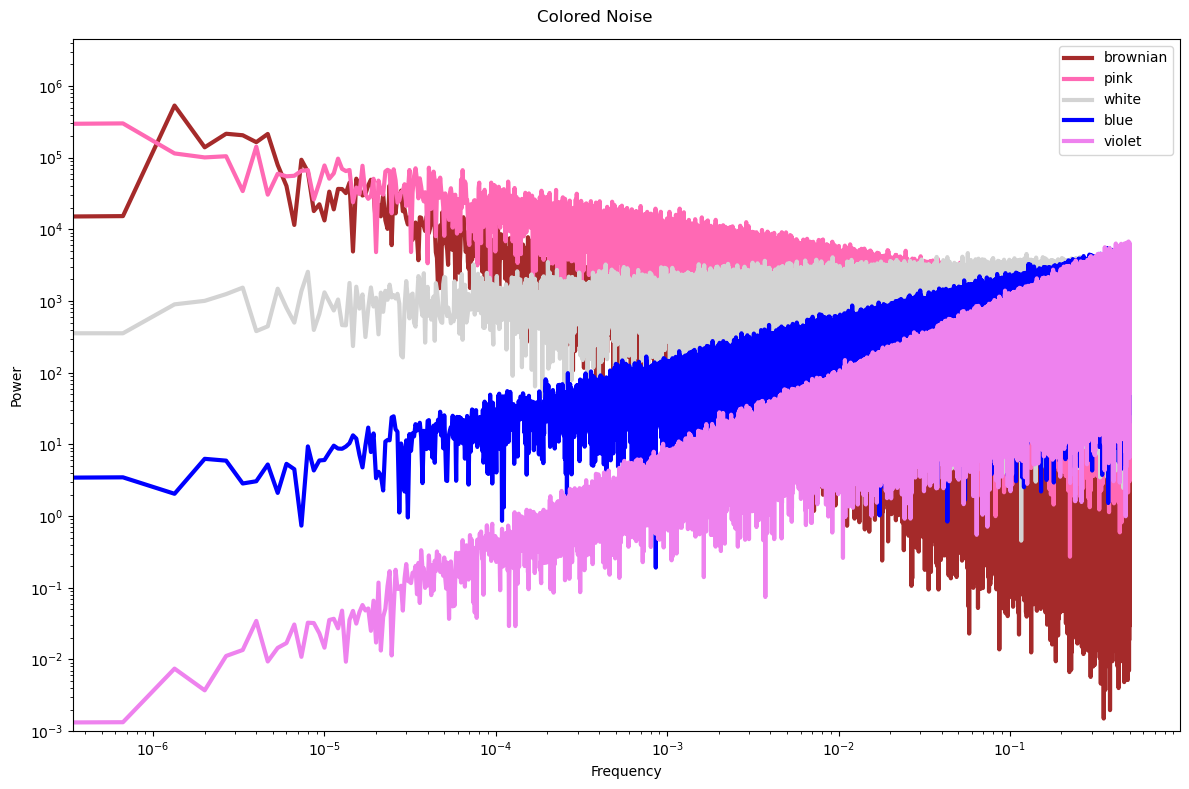

In [10]:
# plt.style.use('dark_background')
plt.figure(figsize=(12, 8), tight_layout=True)
for G, c in zip(
        [brownian_noise, pink_noise, white_noise, blue_noise, violet_noise], 
        ['brown', 'hotpink', 'lightgray', 'blue', 'violet']):
    plot_spectrum(G(30*50_000)).set(color=c, linewidth=3)
plt.legend(['brownian', 'pink', 'white', 'blue', 'violet'])
plt.suptitle("Colored Noise")
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.ylim([1e-3, None])

In [23]:
{'a': 2,'b': 4}['a']

2

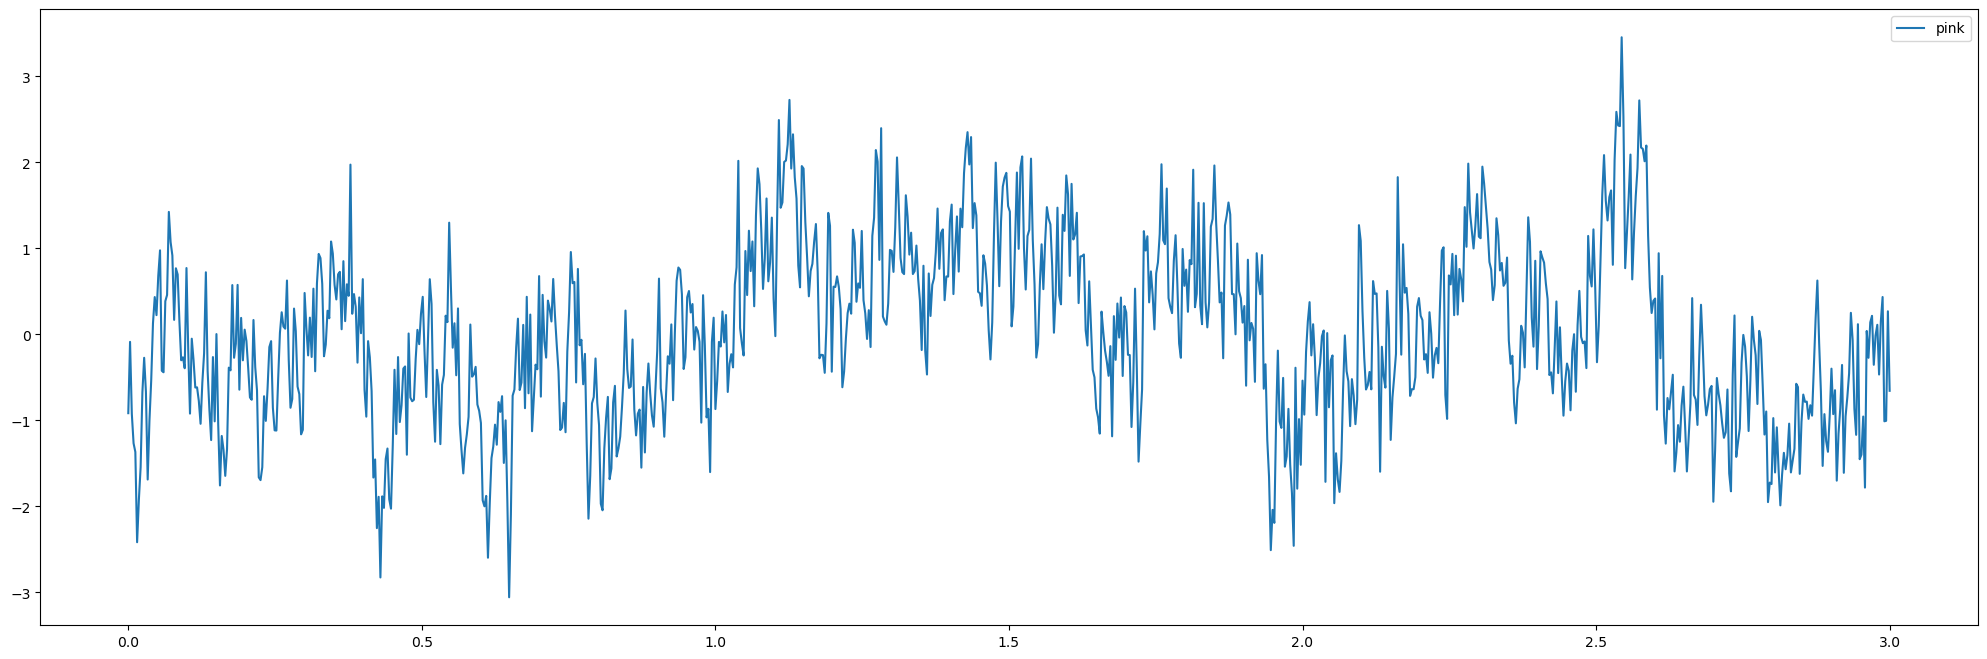

In [22]:
white_noise_signal = white_noise(1000)
brownian_noise_signal = brownian_noise(1000)
pink_noise_signal = pink_noise(1000)
plt.figure(figsize=(25,8))
# plt.plot(np.linspace(0,3,1000), white_noise_signal, label='white')
# plt.plot(np.linspace(0,3,1000), brownian_noise_signal, label='brown')
# plt.plot(np.linspace(0,3,1000), pink_noise_signal, label='pink')
plt.legend()
plt.show()